## Task 1

We have two populations Blue (privileged) and Red (unprivileged), with the Blue population being 9 times larger than the Red population.

Individuals from both populations are requesting to attend XAI training to improve competency in this important area. Number of places is limited. The administrators of the training have decided to give priority to enrolling individuals who may need this training in the future, although unfortunately it is difficult to predict who will benefit.

The decision rule adopted:
1. In the Red group, half of the people will find the skills useful in future and half will not. Administrators randomly allocate 50% of people to training.
2. in the Blue group, 80% of people will find the training useful in future and 20% will not, although of course it is not known who will find it useful. The administrators have built a predictive model based on user behaviour in predicting for whom it will be useful and whom will not. The model has the following performance:


| Blue                     	| Will use XAI 	| Will not use XAI 	| Total 	|
|--------------------------	|--------------	|------------------	|-------	|
| Enrolled in training     	| 60           	| 5               	| 65    	|
| not enrolled in training 	| 20            	| 15               	| 35    	|
| Total                    	| 80           	| 20               	| 100   	|


Task: Calculate the Demographic parity, equal opportunity and predictive rate parity coefficients for this decision rule.

Starred task: How can this decision rule be changed to improve its fairness?

## Solution

Let $G$ - be a random variable that denotes the protected attribute (in this case group; $G=0$ for red and $G=1$ for blue).  
Let $Y$ - be a random variable that denotes whether a person will use XAI in the future ($Y=1$ denotes that a person will use XAI in the future and $Y=0$ that a person won't use XAI in the future ).  
Let $E$ - be a random variable that denotes whether a person was enrolled in the course ($E=1$ mean enrolled and $E = 0$ means not enrolled).  

### Demographic parity can be defined as follows:  
$P(E=1 | G=0) = P(E=1 | G=1)$  
and the coefficient  
$\frac{P(E=1 | G=0)}{P(E=1 | G=1)} = \frac{0.5}{0.65} = 0.769230769231$  
One can note that here the assigment is a bit unfair, as according to lecture range $[0.8;1.2]$ is preferred.  


### Equal opportunity can be defined as follows:  
$P(E=1 | Y = 1, G = 0) = P(E=1 | Y = 1, G = 1)$   
with the coefficient  
$\frac{P(E=1 | Y = 1, G = 0)}{P(E=1 | Y = 1, G = 1)} = \frac{0.5}{0.75} = \frac{2}{3} - 0.667$  


### For predictive rate parity we calculate  positive predictive parity and negative predictive parity can be defined as follows

Positive predictive parity can be defined as follows:  
$P(Y=1 | E = 1, G = 0) = P(Y=1 | E = 1, G = 1)$   
with the coefficient  
$\frac{P(Y=1 | E = 1, G = 0) }{P(Y=1 | E = 1, G = 1)} = \frac{0.5}{\frac{60}{65}} = \frac{65}{120} = \frac{13}{24} = 0.541$  


Negative predictive parity can be defined as follows:  
$P(Y=1 | E = 0, G = 0) = P(Y=1 | E = 0, G = 1)$   
with the coefficient  
$\frac{P(Y=1 | E = 0, G = 0) }{P(Y=1 | E = 0, G = 1)} = \frac{0.5}{\frac{20}{35}} = \frac{35}{40} = \frac{7}{8} = 0.875$ 


### How to improve the coefficients?
One simple solution is to increase the probability of enrolling people from the red group.  
For example when choosing the probability to be $\frac{20}{35}$ we get
$\frac{P(E=1 | G=0)}{P(E=1 | G=1)} = 0.879120879120879$  
$\frac{P(E=1 | Y = 1, G = 0)}{P(E=1 | Y = 1, G = 1)} = 0.7619047619047619$  
$\frac{P(Y=1 | E = 1, G = 0) }{P(Y=1 | E = 1, G = 1)} = 0.619047619047619$  
$\frac{P(Y=1 | E = 0, G = 0) }{P(Y=1 | E = 0, G = 1)} = 1.0$ 

If we aim only at improving  Demographic parity then we can set the probability for the red group to $0.65$.



## Task 2

For this homework, train few models on a selected dataset from https://github.com/ahxt/fair_fairness_benchmark/:

Prepare a knitr/jupiter notebook with the following points.
Submit your results on GitHub to the directory `Homeworks/HW1`.

1. Train a model for the selected dataset. 
2. For the selected protected attribute (age, gender, race) calculate the following fairness coefficients: Statistical parity, Equal opportunity, Predictive parity.
3. Train another model (different hyperparameters, feature transformations etc., different family of models) and see how the coefficients Statistical parity, Equal opportunity, Predictive parity behave for it. Are they different/similar?
4. Apply the selected bias mitigation technique (like data balancing) on the first model. Check how Statistical parity, Equal opportunity, Predictive parity coefficients behave after this mittigation.
5. Compare the quality (performance) of the three models with their fairness coefficients. Is there any correlation/trade off? 
6. ! COMMENT on the results obtained in (2)-(5)


## Alternative task

Alternative homework

If you prefer proving theorems instead of calculations,
then instead of the above assignments, 
you can prove that except for trivial situations 
(independence between a decision with a group), 
no two of the three fairness equalities 
(demographic parity, equal opportunity, predictive rate parity) 
can occur simultaneously.


## **Important note:**

Try to convert the jupyter notebook into an HTML file, e.g. using the following command in bash

```
jupyter nbconvert --to=html --template=classic FILE_NAME.ipynb
```

The submitted homework should consist of two parts:

1. The 1st part is the key results and comments from points (2)-(5). In this part **PLEASE DO NOT SHOW ANY R/PYTHON CODES, ONLY RESULTS (FIGURES, COMMENTS).**
2. The 2nd part should start with the word "Appendix" or "Załącznik" and should include the reproducible R/Python code used to implement points (1)-(5).


## Solution

### Point 1
We train a single Linear Layer.   
With regularization, the model achieves good results on train and test sets within a few epochs.  
This is one of the simplest models, as it can only linearly weight features to form a prediction.  

### Point 2

We select the gender attribute. We ensure the model does not have access to this attribute during the training and evaluation.  
We train 10 models and measure Statistical parity, Equal opportunity, and Predictive parity on the test set. The results are attached below.  
We observe that the models are remarkably unfair when considering statistical parity.  
Further investigation into the data unravels that the train and test data are around 33% females.  
What is more in the train data only 15% of high-salary people are females.
This can be the reason for the low statistical parity coefficient.

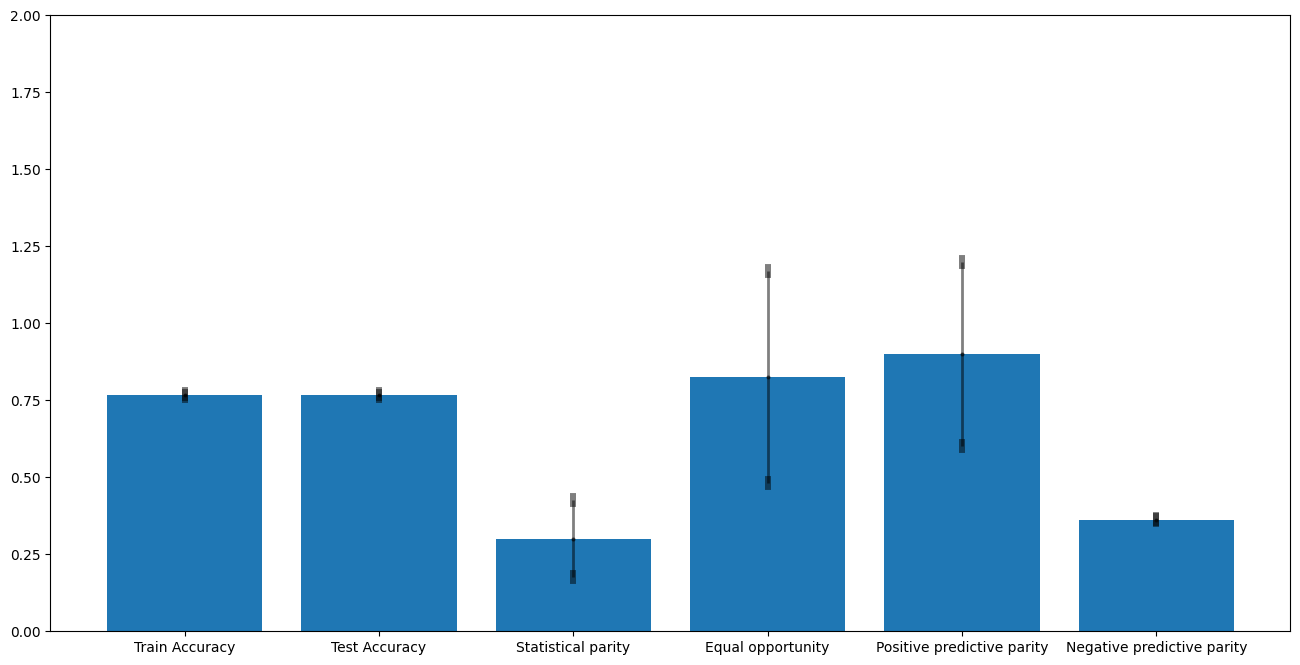

{
  "Train Accuracy": {
    "value": "76.7% +- 0.3"
  },
  "Test Accuracy": {
    "value": "76.7% +- 0.2"
  },
  "Statistical parity": {
    "value": "30.0% +- 12.5"
  },
  "Equal opportunity": {
    "value": "82.6% +- 34.4"
  },
  "Positive predictive parity": {
    "value": "90.0% +- 30.0"
  },
  "Negative predictive parity": {
    "value": "36.2% +- 0.1"
  }
}


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import json

def plot_data(data):

    names = []
    values = []
    stds = []

    brief_results = {}

    for k, v in data.items():
        names.append(k)
        values.append(np.mean(v))
        stds.append(np.std(v))
        brief_results[k] = {
            "value": f"{values[-1]*100:.1f}% +- {stds[-1]*100:.1f}"
        }

    plt.figure(figsize=(16, 8))
    plt.bar(names, values)
    plt.errorbar(
        names,
        values,
        stds,
        fmt=".",
        color="Black",
        elinewidth=2,
        capthick=10,
        errorevery=1,
        alpha=0.5,
        ms=4,
        capsize=2,
    )
    plt.ylim(0, 2)
    plt.show()
    print(json.dumps(brief_results, indent=2))


exp1_data = {'Train Accuracy': [0.7660084366798401, 0.7725499868392944, 0.7654862999916077, 0.7631215453147888, 0.7657627463340759, 0.7690488696098328, 0.7693559527397156, 0.7695402503013611, 0.7616166472434998, 0.7670833468437195], 'Test Accuracy': [0.7715128064155579, 0.7643879652023315, 0.7662919759750366, 0.766906201839447, 0.7697315812110901, 0.7664762735366821, 0.7660462856292725, 0.7652478218078613, 0.7657392024993896, 0.7667833566665649], 'Statistical parity': [0.3557297885417938, 0.0, 0.41244831681251526, 0.3727107644081116, 0.31003767251968384, 0.379006564617157, 0.3877394497394562, 0.18212004005908966, 0.2072400450706482, 0.39089176058769226], 'Equal opportunity': [0.9799462556838989, 0.0, 1.1361913681030273, 1.0267244577407837, 0.8540758490562439, 1.0440677404403687, 1.0681246519088745, 0.501694917678833, 0.5708942413330078, 1.0768085718154907], 'Positive predictive parity': [1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 'Negative predictive parity': [0.36094290848137467, 0.363792571800657, 0.3618201838716416, 0.3619770711412837, 0.3624628778438556, 0.3620570304709764, 0.36213710121897974, 0.36363636363636365, 0.36363752314559816, 0.361818776811426]}

plot_data(exp1_data)

# Point 3
We train 10 simple Swiglu-inspired models, that should have greater capabilities.  
We observe that they have lower variance, better train and test set accuracy, and on average better statistical parity coefficient.
This is not suprising as those models are more expressive.

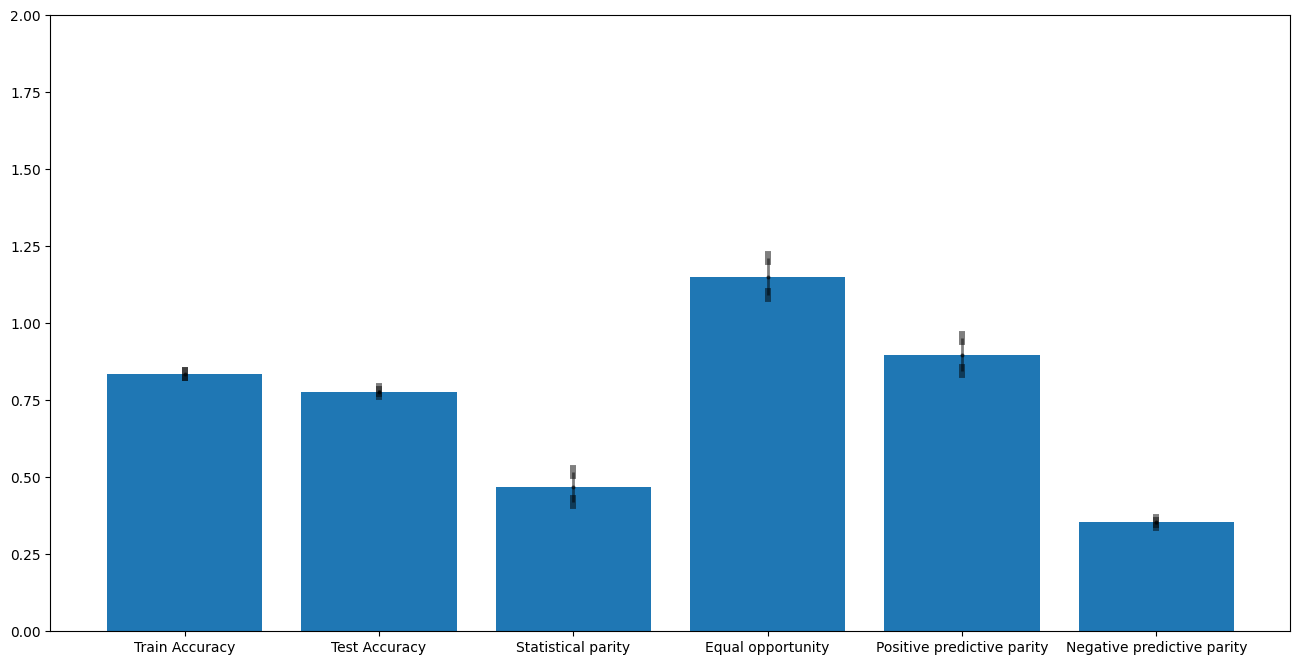

{
  "Train Accuracy": {
    "value": "83.5% +- 0.0"
  },
  "Test Accuracy": {
    "value": "77.8% +- 0.5"
  },
  "Statistical parity": {
    "value": "46.9% +- 4.9"
  },
  "Equal opportunity": {
    "value": "115.2% +- 6.2"
  },
  "Positive predictive parity": {
    "value": "89.7% +- 5.4"
  },
  "Negative predictive parity": {
    "value": "35.4% +- 0.5"
  }
}


In [2]:
exp2_data = {'Train Accuracy': [0.8356316089630127, 0.8350480794906616, 0.8353859186172485, 0.8354166150093079, 0.8351094722747803, 0.8353244662284851, 0.8348944783210754, 0.8348637819290161, 0.8353859186172485, 0.835201621055603], 'Test Accuracy': [0.7790061831474304, 0.7809102535247803, 0.7732325792312622, 0.773908257484436, 0.772986888885498, 0.7769793272018433, 0.7788833379745483, 0.7867453098297119, 0.7874823212623596, 0.7739696502685547], 'Statistical parity': [0.5047736167907715, 0.5061020255088806, 0.4006640911102295, 0.42454472184181213, 0.41289809346199036, 0.47567427158355713, 0.4907732903957367, 0.5256236791610718, 0.5348671078681946, 0.411277711391449], 'Equal opportunity': [1.1842584609985352, 1.2052210569381714, 1.0870057344436646, 1.0583701133728027, 1.1209745407104492, 1.1865085363388062, 1.1808452606201172, 1.2010271549224854, 1.2346292734146118, 1.0583701133728027], 'Positive predictive parity': [0.8516630901287553, 0.8644636015325671, 0.9848484848484849, 0.9049657534246575, 0.9855324074074074, 0.9054807692307693, 0.8734340325005369, 0.829460990695982, 0.8379318794413133, 0.9341581970835173], 'Negative predictive parity': [0.35365971210329417, 0.351834287281944, 0.35896692725876955, 0.3591010388554988, 0.35864159950385344, 0.3547504995226621, 0.353815104359274, 0.3474839680170028, 0.3457156217744996, 0.35903441528613783]}


plot_data(exp2_data)


## Point 4
We prepare a new training dataset by choosing equal number of positive and negative samples for each gender.   
That is in our dataset the number of high earning females is equal to the number of high earning males, and the same hold for people with lower salaries.  
We observe a decrease in accurancy and high variance. What is more some of the models have almost perfect equal opportunity.
However, as noted, the predictive power of the models reduced due to change of the training data.

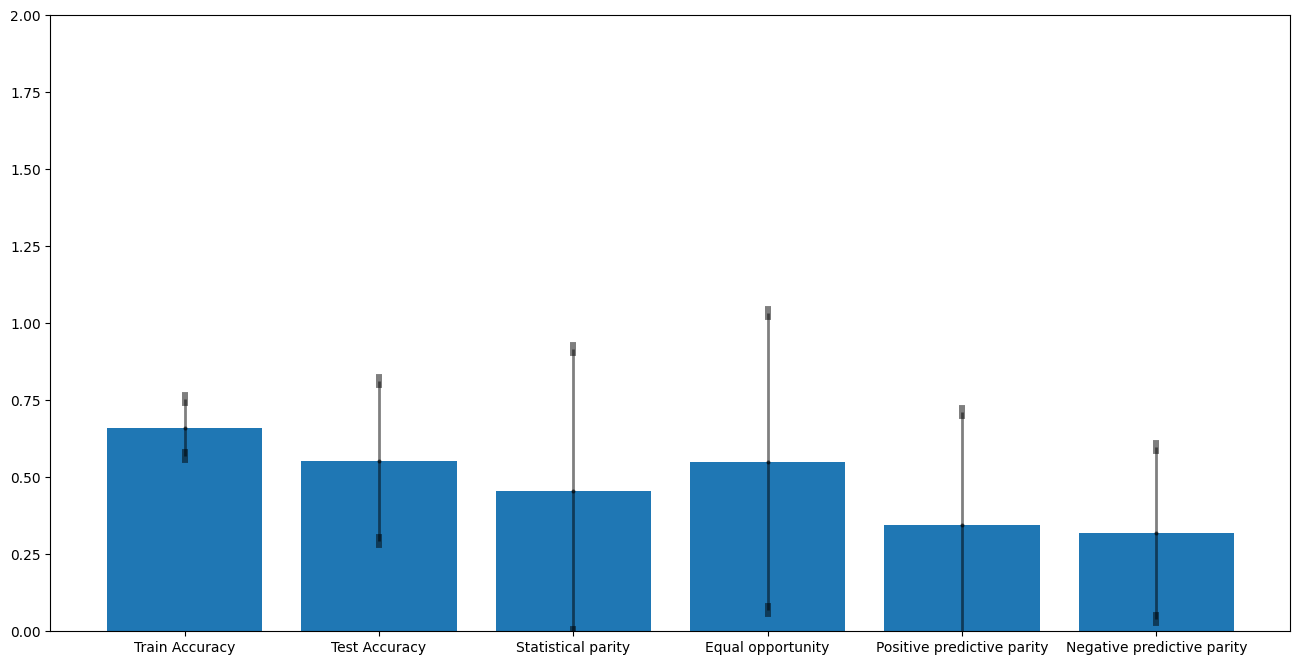

{
  "Train Accuracy": {
    "value": "66.1% +- 9.3"
  },
  "Test Accuracy": {
    "value": "55.3% +- 26.0"
  },
  "Statistical parity": {
    "value": "45.5% +- 46.0"
  },
  "Equal opportunity": {
    "value": "55.1% +- 48.2"
  },
  "Positive predictive parity": {
    "value": "34.5% +- 36.5"
  },
  "Negative predictive parity": {
    "value": "31.8% +- 27.9"
  }
}


In [3]:
exp3_data = {'Train Accuracy': [0.6666666865348816, 0.6618603467941284, 0.7251908183097839, 0.6590330600738525, 0.7777777910232544, 0.7348034977912903, 0.545660138130188, 0.6511167883872986, 0.45207804441452026, 0.73508620262146], 'Test Accuracy': [0.23622627556324005, 0.7637737393379211, 0.23125115036964417, 0.236164852976799, 0.7637737393379211, 0.7646335959434509, 0.23622627556324005, 0.7643879652023315, 0.7682574987411499, 0.7641422748565674], 'Statistical parity': [1.0, 0.0, 1.0038877725601196, 1.0000921487808228, 0.0, 0.15410158038139343, 1.0, 0.0, 0.39409583806991577, 0.0], 'Equal opportunity': [1.0, 0.0, 0.9988261461257935, 1.0003072023391724, 0.0, 0.4245111048221588, 1.0, 0.0, 1.0856349468231201, 0.0], 'Positive predictive parity': [0.36300953567140615, 0.0, 0.36117921866763675, 0.36308762277664575, 0.0, 1.0, 0.36300953567140615, 0.0, 1.0, 0.0], 'Negative predictive parity': [0.0, 0.36300953567140615, 1.0, 0.0, 0.36300953567140615, 0.36347847706044123, 0.0, 0.363792571800657, 0.3611798685955217, 0.36347877910689197]}


plot_data(exp3_data)

## Point 5
The Swiglu models were the most stable (low std) and achieved the highest predition accurancies.  
The best equal opportunity coeff was obtained with some models trained on the balanced data. 
However, training on the balanced data reduced the number of samples and introduced changes between train and test distributions (see point 2).  
We hypothesize that this resulted in models expressing the highest std in the evaluation metrics and achieving the lowest accuracy scores.  
We note that in the case of a simple model, there is a tradeoff between achieving good equal opportunity coeff and obtaining a good predictive model.  
We also note that acquiring a balanced sample of the training data can increase costs and is a more general problem, such as creation of fair image and text generation models.



| Metric                     | Model 1               | Model 2               | Model 3               |
|----------------------------|-----------------------|-----------------------|-----------------------|
| **Train Accuracy**          | 76.7% ± 0.3           | 83.5% ± 0.0           | 66.1% ± 9.3           |
| **Test Accuracy**           | 76.7% ± 0.2           | 77.8% ± 0.5           | 55.3% ± 26.0          |
| **Statistical Parity**      | 30.0% ± 12.5          | 46.9% ± 4.9           | 45.5% ± 46.0          |
| **Equal Opportunity**       | 82.6% ± 34.4          | 115.2% ± 6.2          | 55.1% ± 48.2          |
| **Positive Predictive Parity** | 90.0% ± 30.0         | 89.7% ± 5.4           | 34.5% ± 36.5          |
| **Negative Predictive Parity** | 36.2% ± 0.1         | 35.4% ± 0.5           | 31.8% ± 27.9          |



## Point 6
Results are commented in each point separately.

## Appendix

## Task 2

In [4]:
# First we load and preapare the data about people and their salaries


import torch
import pandas as pd
from io import StringIO
import os
from typing import List, Dict, Callable, Tuple
import copy


def load_and_prepare_data(data_path: str, description_path: str, norm_spec={}):

    def load_data_file(path: str):
        with open(path, "r") as f:
            lines = f.readlines()

        result = [
            l for l in lines if len(l.strip()) == 0 or l.strip()[0] != "|"
        ]  # skip comments
        return result

    def load_data(data_path, description_path):

        def clean(x):
            if len(x) > 0 and x[-1] == ".":
                return x[:-1]
            else:
                return x 

        raw_description = load_data_file(description_path)

        description = []
        possible_values = []
        start = False
        for i, rd in enumerate(raw_description):
            if rd.startswith("age:"):
                start = True

            if start:
                description.append(rd.split(":")[0])
                possible_values.append(clean(v) for v in rd.split(":")[1].strip()[:-1].split(","))
                possible_values[-1] = [pv.strip() for pv in possible_values[-1]]

        description.append("salary")
        possible_values.append([">50K", "<=50K"])

        raw_data = load_data_file(data_path)

        raw_data = [clean(rd.strip()) for rd in raw_data]

        raw_data = [",".join(description)] + raw_data

        raw_data = "\n".join(raw_data)
        raw_data = ",".join(raw_data.split(", "))

        data_frame = pd.read_csv(StringIO(raw_data))

        return data_frame, possible_values

    def prepare_data(
        data_frame: pd.DataFrame,
        possible_values: List[str],
        norm_spec: Dict[str, Callable],
    ):
        norm_spec = copy.deepcopy(norm_spec)
        columns = data_frame.columns
        assert len(columns) == len(possible_values)
        json_data = {}

        for c, pv in zip(columns, possible_values):
            if len(pv) == 1 and pv[0] == "continuous":
                if c not in norm_spec:
                    minv = data_frame[c].min().item()
                    maxv = data_frame[c].max().item()
                    interval = max(maxv - minv, 1.0)
                    ns = lambda x: (x - minv) / interval
                    norm_spec[c] = ns
                json_data[c] = norm_spec[c](data_frame[c].to_numpy())
            else:
                assert len(pv) > 1, pv
                for p in pv:
                    new_c = c + "_" + p
                    json_data[new_c] = (data_frame[c] == p).to_numpy()

        new_df = pd.DataFrame(json_data)

        return new_df, norm_spec

    df, pv = load_data(data_path=data_path, description_path=description_path)

    df, norm_spec = prepare_data(data_frame=df, possible_values=pv, norm_spec=norm_spec)

    return df, norm_spec


train_data_path = os.path.join(os.getcwd(), "adult.data")
test_data_path = os.path.join(os.getcwd(), "adult.test")
description_path = os.path.join(os.getcwd(), "adult.names")

train_df, ns = load_and_prepare_data(train_data_path, description_path)
test_df, ns = load_and_prepare_data(test_data_path, description_path, norm_spec=ns)


In [5]:
from tqdm import tqdm
import numpy as np
import json

DEVICE = torch.device("cpu")

TARGET = "salary_>50K"
REMOVE = ["salary_<=50K", "sex_Female", "sex_Male"]
PROTECTED_ATTRIBUTE = ["sex_Female", "sex_Male"]


def data_to_numpy(data: pd.DataFrame, target: str, remove: List[str]):
    columns_to_keep = [c for c in data.columns if c not in remove]
    json_data = {k: data[k] for k in columns_to_keep}
    data = pd.DataFrame(json_data)

    y = torch.from_numpy(data[target].to_numpy().astype(np.float32))
    columns_without_target = [c for c in columns_to_keep if c != target]
    x = torch.from_numpy(data[columns_without_target].to_numpy().astype(np.float32))

    return x, y


def train(
    model: torch.nn.Module,
    optimizer: torch.optim.Optimizer,
    train_df: pd.DataFrame,
    test_df: pd.DataFrame,
    num_epochs: int,
    batch_size: int,
    device=DEVICE,
    target: str = TARGET,
    remove_columns: List[str] = REMOVE,
):

    test_x, test_y = data_to_numpy(data=test_df, target=target, remove=remove_columns)
    test_x = test_x.to(device)
    test_y = test_y.to(device)

    @torch.no_grad()
    def eval_model(x, y):
        model.eval()
        logits = model(x)
        predictions = (logits[..., 1] > logits[..., 0]).to(torch.float32).flatten()

        accuracy = (predictions == y.flatten()).to(torch.float32).mean()

        return accuracy

    train_x, train_y = data_to_numpy(
        data=train_df, target=target, remove=remove_columns
    )
    num_samples = train_x.shape[0]

    initial_acc = eval_model(test_x, test_y)

    print(f"Initial model accuracy is {initial_acc}")

    epoch_tqdm = tqdm(range(num_epochs))

    for e in epoch_tqdm:
        model.train()
        sample_indices = torch.randperm(num_samples, dtype=torch.long)

        for b_start in tqdm(range(0, num_samples, batch_size), desc="batch"):
            optimizer.zero_grad()
            b_end = min(b_start + batch_size, num_samples)
            b_ids = sample_indices[b_start:b_end]

            batch_x = train_x[b_ids].to(device)
            batch_y = train_y[b_ids].to(device).flatten()
            logits = model(batch_x)

            log_prob = torch.nn.functional.log_softmax(logits, dim=-1)
            loss = batch_y * log_prob[:, 1] + (1 - batch_y) * log_prob[:, 0]
            loss = -loss.mean()

            loss.backward()
            optimizer.step()

        acc = eval_model(test_x, test_y)
        acc_train = eval_model(train_x.to(device), train_y.to(device))
        epoch_tqdm.set_description(
            f"Loss {loss.detach()} At the end of epoch {e} test accuracy is {acc} and train {acc_train}"
        )

    return (
        eval_model(test_x, test_y).numpy().item(),
        eval_model(train_x.to(device), train_y.to(device)).numpy().item(),
    )


@torch.no_grad()
def analyze_fairness(
    model: torch.nn.Module,
    test_df: pd.DataFrame,
    protected_ids: str = PROTECTED_ATTRIBUTE,
    target: str = TARGET,
    remove_columns: List[str] = REMOVE,
    device=DEVICE,
):
    model.eval()
    model.to(device)

    test_x, test_y = data_to_numpy(data=test_df, target=target, remove=remove_columns)
    test_x = test_x.to(device)
    test_y = test_y.numpy().astype(np.bool)

    logits = model(test_x)
    assert len(logits.shape) == 2
    predictions = (logits[:, 1] > logits[:, 0]).cpu().numpy().astype(np.float32)

    def calc_statistical_parity(df, predictions):

        gr_a = df[protected_ids[0]].to_numpy().astype(np.bool)
        gr_b = df[protected_ids[1]].to_numpy().astype(np.bool)

        pos_a = predictions[gr_a].mean()
        pos_b = predictions[gr_b].mean()

        return np.nan_to_num(pos_a / max(pos_b, 1e-7)).item()

    def calc_eq_opportunity(df, predictions, gt):

        gr_a_t = np.logical_and(df[protected_ids[0]].to_numpy().astype(np.bool), gt.astype(np.bool))
        gr_b_t = np.logical_and(df[protected_ids[1]].to_numpy().astype(np.bool), gt.astype(np.bool))

        pos_a = predictions[gr_a_t].mean()
        pos_b = predictions[gr_b_t].mean()

        return np.nan_to_num(pos_a / max(pos_b, 1e-7)).item()

    def calc_pred_parity(df, predictions, gt):
        gr_a_p = np.logical_and(df[protected_ids[0]].to_numpy().astype(np.bool), predictions.astype(np.bool))
        gr_b_p = np.logical_and(df[protected_ids[1]].to_numpy().astype(np.bool), predictions.astype(np.bool))

        pos_pred_rate_parity = np.nan_to_num(
            np.nan_to_num(gt[gr_a_p].mean().item())
            / max(np.nan_to_num(gt[gr_b_p].mean()).item(), 1e-7)
        )

        gr_a_np = np.logical_and(
            df[protected_ids[0]].to_numpy().astype(np.bool), np.logical_not(predictions.astype(np.bool))
        )
        gr_b_np = np.logical_and(
            df[protected_ids[1]].to_numpy().astype(np.bool), np.logical_not(predictions.astype(np.bool))
        )

        neg_pred_rate_parity = np.nan_to_num(
            np.nan_to_num(gt[gr_a_np].mean().item())
            / max(np.nan_to_num(gt[gr_b_np].mean()).item(), 1e-7)
        )

        return pos_pred_rate_parity.item(), neg_pred_rate_parity.item()

    stat_parity = calc_statistical_parity(df=test_df, predictions=predictions)

    eq_opport = calc_eq_opportunity(df=test_df, predictions=predictions, gt=test_y)

    pos_pred_par, neg_pred_par = calc_pred_parity(
        df=test_df, predictions=predictions, gt=test_y
    )

    res = {
        "Statistical parity": stat_parity,
        "Equal opportunity": eq_opport,
        "Positive predictive parity": pos_pred_par,
        "Negative predictive parity": neg_pred_par,
    }

    print(json.dumps(res, indent=2))

    return res

## Part 1

In [6]:
class SwigluBlock(torch.nn.Module):
    def __init__(self, in_dim: int, inner_dim: int, out_dim: int):
        super().__init__()

        self.up_proj = torch.nn.Linear(
            in_features=in_dim, out_features=inner_dim, bias=True
        )
        self.gate = torch.nn.Linear(
            in_features=in_dim, out_features=inner_dim, bias=True
        )
        self.down_proj = torch.nn.Linear(
            in_features=inner_dim, out_features=out_dim, bias=True
        )

    def forward(self, x: torch.Tensor):
        u = self.up_proj(x)
        g = self.gate(x)

        y = u * torch.nn.functional.silu(g)
        z = self.down_proj(y)

        return z
    

class SimpleLinear(torch.nn.Module):
    def __init__(self, in_dim: int, out_dim: int):
        super().__init__()

        self.proj = torch.nn.Linear(
            in_features=in_dim, out_features=out_dim, bias=True
        )
        

    def forward(self, x: torch.Tensor):

        return self.proj(x)


In [7]:
exp1_fairness_data = {"Train Accuracy": [], "Test Accuracy": []}
torch.manual_seed(42)
for i in range(10):
    print(f"Model {i}")
    model = SimpleLinear(in_dim=103, out_dim=2)
    model.to(DEVICE)
    optim = torch.optim.AdamW(params=model.parameters(), lr=1e-4, weight_decay=0.1)

    final_acc_test, final_acc_train = train(
        model=model,
        optimizer=optim,
        train_df=train_df,
        test_df=test_df,
        num_epochs=3,
        batch_size=64,
        device=DEVICE,
    )
    res = analyze_fairness(model=model, test_df=test_df)
    for k, v in res.items():
        if k not in exp1_fairness_data:
            exp1_fairness_data[k] = []
        exp1_fairness_data[k].append(v)
    exp1_fairness_data["Test Accuracy"].append(final_acc_test)
    exp1_fairness_data["Train Accuracy"].append(final_acc_train)

Model 0
Initial model accuracy is 0.23622627556324005


batch: 100%|██████████| 509/509 [00:00<00:00, 596.33it/s]cy is 0.7747681140899658 and train 0.7602346539497375:  67%|██████▋   | 2/3 [00:01<00:01,  1.02s/it]
Loss 0.393289715051651 At the end of epoch 2 test accuracy is 0.7715128064155579 and train 0.7660084366798401: 100%|██████████| 3/3 [00:02<00:00,  1.04it/s] 


{
  "Statistical parity": 0.3557297885417938,
  "Equal opportunity": 0.9799462556838989,
  "Positive predictive parity": 1.0,
  "Negative predictive parity": 0.36094290848137467
}
Model 1
Initial model accuracy is 0.7637737393379211


batch: 100%|██████████| 509/509 [00:00<00:00, 652.31it/s]acy is 0.7643265128135681 and train 0.7610945701599121:  67%|██████▋   | 2/3 [00:01<00:00,  1.12it/s]
Loss 0.4660312533378601 At the end of epoch 2 test accuracy is 0.7643879652023315 and train 0.7725499868392944: 100%|██████████| 3/3 [00:02<00:00,  1.18it/s] 
/tmp/ipykernel_11675/2636794302.py:138: RuntimeWarning: Mean of empty slice.
  np.nan_to_num(gt[gr_a_p].mean().item())
/home/skonrad/Arbeit/eXplainableMachineLearning-2025/.venv/lib/python3.12/site-packages/numpy/_core/_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


{
  "Statistical parity": 0.0,
  "Equal opportunity": 0.0,
  "Positive predictive parity": 0.0,
  "Negative predictive parity": 0.363792571800657
}
Model 2
Initial model accuracy is 0.23622627556324005


batch: 100%|██████████| 509/509 [00:00<00:00, 624.37it/s]acy is 0.7660462856292725 and train 0.7594975829124451:  67%|██████▋   | 2/3 [00:01<00:00,  1.31it/s]
Loss 0.4865451753139496 At the end of epoch 2 test accuracy is 0.7662919759750366 and train 0.7654862999916077: 100%|██████████| 3/3 [00:02<00:00,  1.28it/s] 


{
  "Statistical parity": 0.41244831681251526,
  "Equal opportunity": 1.1361913681030273,
  "Positive predictive parity": 1.0,
  "Negative predictive parity": 0.3618201838716416
}
Model 3
Initial model accuracy is 0.3720901608467102


batch: 100%|██████████| 509/509 [00:01<00:00, 433.44it/s]cy is 0.7667833566665649 and train 0.7596818208694458:  67%|██████▋   | 2/3 [00:02<00:01,  1.13s/it]
Loss 0.4607338309288025 At the end of epoch 2 test accuracy is 0.766906201839447 and train 0.7631215453147888: 100%|██████████| 3/3 [00:03<00:00,  1.12s/it] 


{
  "Statistical parity": 0.3727107644081116,
  "Equal opportunity": 1.0267244577407837,
  "Positive predictive parity": 1.0,
  "Negative predictive parity": 0.3619770711412837
}
Model 4
Initial model accuracy is 0.23622627556324005


batch: 100%|██████████| 509/509 [00:00<00:00, 549.26it/s]cy is 0.7707143425941467 and train 0.7606953382492065:  67%|██████▋   | 2/3 [00:02<00:01,  1.12s/it]
Loss 0.47550061345100403 At the end of epoch 2 test accuracy is 0.7697315812110901 and train 0.7657627463340759: 100%|██████████| 3/3 [00:03<00:00,  1.07s/it]


{
  "Statistical parity": 0.31003767251968384,
  "Equal opportunity": 0.8540758490562439,
  "Positive predictive parity": 1.0,
  "Negative predictive parity": 0.3624628778438556
}
Model 5
Initial model accuracy is 0.7685645818710327


batch: 100%|██████████| 509/509 [00:01<00:00, 367.00it/s]acy is 0.7661077380180359 and train 0.7623844742774963:  67%|██████▋   | 2/3 [00:02<00:01,  1.36s/it]
Loss 0.47792357206344604 At the end of epoch 2 test accuracy is 0.7664762735366821 and train 0.7690488696098328: 100%|██████████| 3/3 [00:04<00:00,  1.33s/it]


{
  "Statistical parity": 0.379006564617157,
  "Equal opportunity": 1.0440677404403687,
  "Positive predictive parity": 1.0,
  "Negative predictive parity": 0.3620570304709764
}
Model 6
Initial model accuracy is 0.765677809715271


batch: 100%|██████████| 509/509 [00:01<00:00, 395.23it/s]cy is 0.7655549645423889 and train 0.7611867189407349:  67%|██████▋   | 2/3 [00:02<00:01,  1.15s/it]
Loss 0.48946714401245117 At the end of epoch 2 test accuracy is 0.7660462856292725 and train 0.7693559527397156: 100%|██████████| 3/3 [00:03<00:00,  1.22s/it]


{
  "Statistical parity": 0.3877394497394562,
  "Equal opportunity": 1.0681246519088745,
  "Positive predictive parity": 1.0,
  "Negative predictive parity": 0.36213710121897974
}
Model 7
Initial model accuracy is 0.23063693940639496


batch: 100%|██████████| 509/509 [00:01<00:00, 449.36it/s]cy is 0.7645722031593323 and train 0.7638586163520813:  67%|██████▋   | 2/3 [00:01<00:00,  1.10it/s]
Loss 0.46921446919441223 At the end of epoch 2 test accuracy is 0.7652478218078613 and train 0.7695402503013611: 100%|██████████| 3/3 [00:02<00:00,  1.00it/s]


{
  "Statistical parity": 0.18212004005908966,
  "Equal opportunity": 0.501694917678833,
  "Positive predictive parity": 1.0,
  "Negative predictive parity": 0.36363636363636365
}
Model 8
Initial model accuracy is 0.23475216329097748


batch: 100%|██████████| 509/509 [00:01<00:00, 376.57it/s]cy is 0.7650021314620972 and train 0.7594054341316223:  67%|██████▋   | 2/3 [00:02<00:01,  1.28s/it]
Loss 0.4808824956417084 At the end of epoch 2 test accuracy is 0.7657392024993896 and train 0.7616166472434998: 100%|██████████| 3/3 [00:03<00:00,  1.28s/it]


{
  "Statistical parity": 0.2072400450706482,
  "Equal opportunity": 0.5708942413330078,
  "Positive predictive parity": 1.0,
  "Negative predictive parity": 0.36363752314559816
}
Model 9
Initial model accuracy is 0.23475216329097748


batch: 100%|██████████| 509/509 [00:00<00:00, 705.94it/s]acy is 0.7657392024993896 and train 0.760388195514679:  67%|██████▋   | 2/3 [00:02<00:01,  1.01s/it] 
Loss 0.3731554448604584 At the end of epoch 2 test accuracy is 0.7667833566665649 and train 0.7670833468437195: 100%|██████████| 3/3 [00:02<00:00,  1.08it/s]


{
  "Statistical parity": 0.39089176058769226,
  "Equal opportunity": 1.0768085718154907,
  "Positive predictive parity": 1.0,
  "Negative predictive parity": 0.361818776811426
}


In [8]:
exp2_fairness_data = {"Train Accuracy": [], "Test Accuracy": []}
torch.manual_seed(42)
for i in range(10):
    print(f"Model {i}")
    model = SwigluBlock(in_dim=103, inner_dim=256, out_dim=2)
    model.to(DEVICE)
    optim = torch.optim.AdamW(params=model.parameters(), lr=1e-4, weight_decay=0.0)

    final_acc_test, final_acc_train = train(
        model=model,
        optimizer=optim,
        train_df=train_df,
        test_df=test_df,
        num_epochs=3,
        batch_size=64,
        device=DEVICE,
    )
    res = analyze_fairness(model=model, test_df=test_df)
    for k, v in res.items():
        if k not in exp2_fairness_data:
            exp2_fairness_data[k] = []
        exp2_fairness_data[k].append(v)
    exp2_fairness_data["Test Accuracy"].append(final_acc_test)
    exp2_fairness_data["Train Accuracy"].append(final_acc_train)

Model 0
Initial model accuracy is 0.7637737393379211


batch: 100%|██████████| 509/509 [00:01<00:00, 341.96it/s]acy is 0.7733554244041443 and train 0.8324990272521973:  67%|██████▋   | 2/3 [00:03<00:01,  1.75s/it]
Loss 0.29611343145370483 At the end of epoch 2 test accuracy is 0.7790061831474304 and train 0.8356316089630127: 100%|██████████| 3/3 [00:05<00:00,  1.78s/it]


{
  "Statistical parity": 0.5047736167907715,
  "Equal opportunity": 1.1842584609985352,
  "Positive predictive parity": 0.8516630901287553,
  "Negative predictive parity": 0.35365971210329417
}
Model 1
Initial model accuracy is 0.77501380443573


batch: 100%|██████████| 509/509 [00:01<00:00, 328.26it/s]cy is 0.7739696502685547 and train 0.8326218724250793:  67%|██████▋   | 2/3 [00:03<00:01,  1.51s/it] 
Loss 0.5410016775131226 At the end of epoch 2 test accuracy is 0.7809102535247803 and train 0.8350480794906616: 100%|██████████| 3/3 [00:04<00:00,  1.59s/it]


{
  "Statistical parity": 0.5061020255088806,
  "Equal opportunity": 1.2052210569381714,
  "Positive predictive parity": 0.8644636015325671,
  "Negative predictive parity": 0.351834287281944
}
Model 2
Initial model accuracy is 0.7694244980812073


batch: 100%|██████████| 509/509 [00:01<00:00, 290.49it/s]cy is 0.7704071998596191 and train 0.8321918845176697:  67%|██████▋   | 2/3 [00:02<00:01,  1.46s/it]
Loss 0.29967764019966125 At the end of epoch 2 test accuracy is 0.7732325792312622 and train 0.8353859186172485: 100%|██████████| 3/3 [00:04<00:00,  1.64s/it]


{
  "Statistical parity": 0.4006640911102295,
  "Equal opportunity": 1.0870057344436646,
  "Positive predictive parity": 0.9848484848484849,
  "Negative predictive parity": 0.35896692725876955
}
Model 3
Initial model accuracy is 0.7637737393379211


batch: 100%|██████████| 509/509 [00:01<00:00, 378.82it/s]acy is 0.7712671160697937 and train 0.8328061103820801:  67%|██████▋   | 2/3 [00:03<00:01,  1.74s/it]
Loss 0.3732415437698364 At the end of epoch 2 test accuracy is 0.773908257484436 and train 0.8354166150093079: 100%|██████████| 3/3 [00:05<00:00,  1.67s/it]  


{
  "Statistical parity": 0.42454472184181213,
  "Equal opportunity": 1.0583701133728027,
  "Positive predictive parity": 0.9049657534246575,
  "Negative predictive parity": 0.3591010388554988
}
Model 4
Initial model accuracy is 0.7637737393379211


batch: 100%|██████████| 509/509 [00:01<00:00, 382.67it/s]acy is 0.769608736038208 and train 0.832130491733551:  67%|██████▋   | 2/3 [00:03<00:01,  1.56s/it] 
Loss 0.43455374240875244 At the end of epoch 2 test accuracy is 0.772986888885498 and train 0.8351094722747803: 100%|██████████| 3/3 [00:04<00:00,  1.54s/it]


{
  "Statistical parity": 0.41289809346199036,
  "Equal opportunity": 1.1209745407104492,
  "Positive predictive parity": 0.9855324074074074,
  "Negative predictive parity": 0.35864159950385344
}
Model 5
Initial model accuracy is 0.23469074070453644


batch: 100%|██████████| 509/509 [00:01<00:00, 358.02it/s]acy is 0.7716970443725586 and train 0.8320383429527283:  67%|██████▋   | 2/3 [00:03<00:01,  1.54s/it]
Loss 0.5593229532241821 At the end of epoch 2 test accuracy is 0.7769793272018433 and train 0.8353244662284851: 100%|██████████| 3/3 [00:04<00:00,  1.56s/it] 


{
  "Statistical parity": 0.47567427158355713,
  "Equal opportunity": 1.1865085363388062,
  "Positive predictive parity": 0.9054807692307693,
  "Negative predictive parity": 0.3547504995226621
}
Model 6
Initial model accuracy is 0.23505927622318268


batch: 100%|██████████| 509/509 [00:01<00:00, 383.84it/s]acy is 0.7724955677986145 and train 0.8326218724250793:  67%|██████▋   | 2/3 [00:03<00:01,  1.50s/it]
Loss 0.3721742331981659 At the end of epoch 2 test accuracy is 0.7788833379745483 and train 0.8348944783210754: 100%|██████████| 3/3 [00:04<00:00,  1.51s/it] 


{
  "Statistical parity": 0.4907732903957367,
  "Equal opportunity": 1.1808452606201172,
  "Positive predictive parity": 0.8734340325005369,
  "Negative predictive parity": 0.353815104359274
}
Model 7
Initial model accuracy is 0.23505927622318268


batch: 100%|██████████| 509/509 [00:01<00:00, 318.55it/s]acy is 0.7747067213058472 and train 0.8320690393447876:  67%|██████▋   | 2/3 [00:03<00:01,  1.55s/it]
Loss 0.42755788564682007 At the end of epoch 2 test accuracy is 0.7867453098297119 and train 0.8348637819290161: 100%|██████████| 3/3 [00:04<00:00,  1.63s/it]


{
  "Statistical parity": 0.5256236791610718,
  "Equal opportunity": 1.2010271549224854,
  "Positive predictive parity": 0.829460990695982,
  "Negative predictive parity": 0.3474839680170028
}
Model 8
Initial model accuracy is 0.23622627556324005


batch: 100%|██████████| 509/509 [00:01<00:00, 376.28it/s]acy is 0.7765493392944336 and train 0.8323147296905518:  67%|██████▋   | 2/3 [00:03<00:01,  1.69s/it]
Loss 0.2896631956100464 At the end of epoch 2 test accuracy is 0.7874823212623596 and train 0.8353859186172485: 100%|██████████| 3/3 [00:04<00:00,  1.66s/it] 


{
  "Statistical parity": 0.5348671078681946,
  "Equal opportunity": 1.2346292734146118,
  "Positive predictive parity": 0.8379318794413133,
  "Negative predictive parity": 0.3457156217744996
}
Model 9
Initial model accuracy is 0.23395368456840515


batch: 100%|██████████| 509/509 [00:01<00:00, 338.87it/s]cy is 0.7707143425941467 and train 0.832130491733551:  67%|██████▋   | 2/3 [00:02<00:01,  1.46s/it] 
Loss 0.2629174590110779 At the end of epoch 2 test accuracy is 0.7739696502685547 and train 0.835201621055603: 100%|██████████| 3/3 [00:04<00:00,  1.53s/it]


{
  "Statistical parity": 0.411277711391449,
  "Equal opportunity": 1.0583701133728027,
  "Positive predictive parity": 0.9341581970835173,
  "Negative predictive parity": 0.35903441528613783
}


In [9]:
exp3_fairness_data = {"Train Accuracy": [], "Test Accuracy": []}
torch.manual_seed(42)
for i in range(10):
    print(f"Model {i}")
    model = SimpleLinear(in_dim=103, out_dim=2)
    model.to(DEVICE)
    optim = torch.optim.AdamW(params=model.parameters(), lr=1e-4, weight_decay=0.1)

    gr_a_data = train_df[train_df[PROTECTED_ATTRIBUTE[0]]]
    gr_b_data = train_df[train_df[PROTECTED_ATTRIBUTE[1]]]

    gr_a_neg = gr_a_data[np.logical_not(gr_a_data[TARGET].to_numpy())]
    gr_a_pos = gr_a_data[gr_a_data[TARGET]]


    gr_b_neg = gr_b_data[np.logical_not(gr_b_data[TARGET].to_numpy())]
    gr_b_pos = gr_b_data[gr_b_data[TARGET].to_numpy()]


    min_len = min(len(gr_a_neg), len(gr_a_pos), len(gr_b_neg), len(gr_b_pos))

    gr_a_neg = gr_a_neg.iloc[:min_len]
    gr_a_pos = gr_a_pos.iloc[:min_len]


    gr_b_neg = gr_b_neg.iloc[:min_len]
    gr_b_pos = gr_b_pos.iloc[:min_len]


    ballanced_train_df = pd.concat([gr_a_neg, gr_a_pos, gr_b_neg], axis=0)

    final_acc_test, final_acc_train = train(
        model=model,
        optimizer=optim,
        train_df=ballanced_train_df,
        test_df=test_df,
        num_epochs=3,
        batch_size=64,
        device=DEVICE,
    )
    res = analyze_fairness(model=model, test_df=test_df)
    for k, v in res.items():
        if k not in exp3_fairness_data:
            exp3_fairness_data[k] = []
        exp3_fairness_data[k].append(v)
    exp3_fairness_data["Test Accuracy"].append(final_acc_test)
    exp3_fairness_data["Train Accuracy"].append(final_acc_train)

Model 0
Initial model accuracy is 0.23622627556324005


batch: 100%|██████████| 56/56 [00:00<00:00, 788.13it/s]racy is 0.23622627556324005 and train 0.6621430516242981:  67%|██████▋   | 2/3 [00:00<00:00, 12.28it/s]
Loss 0.6261046528816223 At the end of epoch 2 test accuracy is 0.23622627556324005 and train 0.6666666865348816: 100%|██████████| 3/3 [00:00<00:00, 12.34it/s]
/tmp/ipykernel_11675/2636794302.py:150: RuntimeWarning: Mean of empty slice.
  np.nan_to_num(gt[gr_a_np].mean().item())
/home/skonrad/Arbeit/eXplainableMachineLearning-2025/.venv/lib/python3.12/site-packages/numpy/_core/_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/tmp/ipykernel_11675/2636794302.py:151: RuntimeWarning: Mean of empty slice.
  / max(np.nan_to_num(gt[gr_b_np].mean()).item(), 1e-7)


{
  "Statistical parity": 1.0,
  "Equal opportunity": 1.0,
  "Positive predictive parity": 0.36300953567140615,
  "Negative predictive parity": 0.0
}
Model 1
Initial model accuracy is 0.7637737393379211


batch: 100%|██████████| 56/56 [00:00<00:00, 774.84it/s]racy is 0.7637737393379211 and train 0.5253039002418518:  67%|██████▋   | 2/3 [00:00<00:00, 13.26it/s]
Loss 0.6877762079238892 At the end of epoch 2 test accuracy is 0.7637737393379211 and train 0.6618603467941284: 100%|██████████| 3/3 [00:00<00:00, 12.96it/s]
/tmp/ipykernel_11675/2636794302.py:138: RuntimeWarning: Mean of empty slice.
  np.nan_to_num(gt[gr_a_p].mean().item())
/home/skonrad/Arbeit/eXplainableMachineLearning-2025/.venv/lib/python3.12/site-packages/numpy/_core/_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/tmp/ipykernel_11675/2636794302.py:139: RuntimeWarning: Mean of empty slice.
  / max(np.nan_to_num(gt[gr_b_p].mean()).item(), 1e-7)


{
  "Statistical parity": 0.0,
  "Equal opportunity": 0.0,
  "Positive predictive parity": 0.0,
  "Negative predictive parity": 0.36300953567140615
}
Model 2
Initial model accuracy is 0.23303237557411194


batch: 100%|██████████| 56/56 [00:00<00:00, 740.55it/s]racy is 0.23198820650577545 and train 0.7178399562835693:  67%|██████▋   | 2/3 [00:00<00:00, 13.56it/s]
Loss 0.594783365726471 At the end of epoch 2 test accuracy is 0.23125115036964417 and train 0.7251908183097839: 100%|██████████| 3/3 [00:00<00:00, 12.94it/s] 


{
  "Statistical parity": 1.0038877725601196,
  "Equal opportunity": 0.9988261461257935,
  "Positive predictive parity": 0.36117921866763675,
  "Negative predictive parity": 1.0
}
Model 3
Initial model accuracy is 0.235857754945755


batch: 100%|██████████| 56/56 [00:00<00:00, 743.25it/s]racy is 0.23604200780391693 and train 0.6375459432601929:  67%|██████▋   | 2/3 [00:00<00:00, 13.02it/s]
Loss 0.6297588348388672 At the end of epoch 2 test accuracy is 0.236164852976799 and train 0.6590330600738525: 100%|██████████| 3/3 [00:00<00:00, 12.66it/s]  
/tmp/ipykernel_11675/2636794302.py:150: RuntimeWarning: Mean of empty slice.
  np.nan_to_num(gt[gr_a_np].mean().item())
/home/skonrad/Arbeit/eXplainableMachineLearning-2025/.venv/lib/python3.12/site-packages/numpy/_core/_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


{
  "Statistical parity": 1.0000921487808228,
  "Equal opportunity": 1.0003072023391724,
  "Positive predictive parity": 0.36308762277664575,
  "Negative predictive parity": 0.0
}
Model 4
Initial model accuracy is 0.22209937870502472


batch: 100%|██████████| 56/56 [00:00<00:00, 809.32it/s]racy is 0.7637122869491577 and train 0.7480915784835815:  67%|██████▋   | 2/3 [00:00<00:00, 12.51it/s]
Loss 0.6101513504981995 At the end of epoch 2 test accuracy is 0.7637737393379211 and train 0.7777777910232544: 100%|██████████| 3/3 [00:00<00:00, 12.62it/s]
/tmp/ipykernel_11675/2636794302.py:138: RuntimeWarning: Mean of empty slice.
  np.nan_to_num(gt[gr_a_p].mean().item())
/home/skonrad/Arbeit/eXplainableMachineLearning-2025/.venv/lib/python3.12/site-packages/numpy/_core/_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/tmp/ipykernel_11675/2636794302.py:139: RuntimeWarning: Mean of empty slice.
  / max(np.nan_to_num(gt[gr_b_p].mean()).item(), 1e-7)


{
  "Statistical parity": 0.0,
  "Equal opportunity": 0.0,
  "Positive predictive parity": 0.0,
  "Negative predictive parity": 0.36300953567140615
}
Model 5
Initial model accuracy is 0.7646335959434509


batch: 100%|██████████| 56/56 [00:00<00:00, 718.72it/s]racy is 0.7645722031593323 and train 0.6963528394699097:  67%|██████▋   | 2/3 [00:00<00:00, 12.90it/s]
Loss 0.639954149723053 At the end of epoch 2 test accuracy is 0.7646335959434509 and train 0.7348034977912903: 100%|██████████| 3/3 [00:00<00:00, 12.46it/s] 


{
  "Statistical parity": 0.15410158038139343,
  "Equal opportunity": 0.4245111048221588,
  "Positive predictive parity": 1.0,
  "Negative predictive parity": 0.36347847706044123
}
Model 6
Initial model accuracy is 0.23622627556324005


batch: 100%|██████████| 56/56 [00:00<00:00, 793.64it/s]racy is 0.23622627556324005 and train 0.47045519948005676:  67%|██████▋   | 2/3 [00:00<00:00, 12.63it/s]
Loss 0.6983863711357117 At the end of epoch 2 test accuracy is 0.23622627556324005 and train 0.545660138130188: 100%|██████████| 3/3 [00:00<00:00, 12.63it/s]  
/tmp/ipykernel_11675/2636794302.py:150: RuntimeWarning: Mean of empty slice.
  np.nan_to_num(gt[gr_a_np].mean().item())
/home/skonrad/Arbeit/eXplainableMachineLearning-2025/.venv/lib/python3.12/site-packages/numpy/_core/_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/tmp/ipykernel_11675/2636794302.py:151: RuntimeWarning: Mean of empty slice.
  / max(np.nan_to_num(gt[gr_b_np].mean()).item(), 1e-7)


{
  "Statistical parity": 1.0,
  "Equal opportunity": 1.0,
  "Positive predictive parity": 0.36300953567140615,
  "Negative predictive parity": 0.0
}
Model 7
Initial model accuracy is 0.7641422748565674


batch: 100%|██████████| 56/56 [00:00<00:00, 796.37it/s]racy is 0.7643265128135681 and train 0.5493355989456177:  67%|██████▋   | 2/3 [00:00<00:00, 12.91it/s]
Loss 0.6983003616333008 At the end of epoch 2 test accuracy is 0.7643879652023315 and train 0.6511167883872986: 100%|██████████| 3/3 [00:00<00:00, 12.86it/s]
/tmp/ipykernel_11675/2636794302.py:138: RuntimeWarning: Mean of empty slice.
  np.nan_to_num(gt[gr_a_p].mean().item())
/home/skonrad/Arbeit/eXplainableMachineLearning-2025/.venv/lib/python3.12/site-packages/numpy/_core/_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


{
  "Statistical parity": 0.0,
  "Equal opportunity": 0.0,
  "Positive predictive parity": 0.0,
  "Negative predictive parity": 0.363792571800657
}
Model 8
Initial model accuracy is 0.2365948110818863


batch: 100%|██████████| 56/56 [00:00<00:00, 813.60it/s]racy is 0.7694244980812073 and train 0.3754594326019287:  67%|██████▋   | 2/3 [00:00<00:00, 12.52it/s]
Loss 0.7009738087654114 At the end of epoch 2 test accuracy is 0.7682574987411499 and train 0.45207804441452026: 100%|██████████| 3/3 [00:00<00:00, 12.68it/s]


{
  "Statistical parity": 0.39409583806991577,
  "Equal opportunity": 1.0856349468231201,
  "Positive predictive parity": 1.0,
  "Negative predictive parity": 0.3611798685955217
}
Model 9
Initial model accuracy is 0.7638351321220398


batch: 100%|██████████| 56/56 [00:00<00:00, 823.02it/s]acy is 0.764080822467804 and train 0.6632739901542664:  67%|██████▋   | 2/3 [00:00<00:00, 13.08it/s]
Loss 0.661750316619873 At the end of epoch 2 test accuracy is 0.7641422748565674 and train 0.73508620262146: 100%|██████████| 3/3 [00:00<00:00, 13.10it/s] 
/tmp/ipykernel_11675/2636794302.py:138: RuntimeWarning: Mean of empty slice.
  np.nan_to_num(gt[gr_a_p].mean().item())
/home/skonrad/Arbeit/eXplainableMachineLearning-2025/.venv/lib/python3.12/site-packages/numpy/_core/_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


{
  "Statistical parity": 0.0,
  "Equal opportunity": 0.0,
  "Positive predictive parity": 0.0,
  "Negative predictive parity": 0.36347877910689197
}
